# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

8412


In [2]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [3]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections_3color')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

creating folder: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color


# Illumination_correction

In [4]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if 'Cy' in _fd or 'H0R0' in _fd]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 64
- Number of field of views: 71
['\\\\10.245.74.158\\Chromatin_NAS_6\\20200807-B_Dox-IAA-STI+_CTP-08_IgH\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_6\\20200807-B_Dox-IAA-STI+_CTP-08_IgH\\H61R24Cy7', '\\\\10.245.74.158\\Chromatin_NAS_6\\20200807-B_Dox-IAA-STI+_CTP-08_IgH\\H62R24Cy5', '\\\\10.245.74.158\\Chromatin_NAS_6\\20200807-B_Dox-IAA-STI+_CTP-08_IgH\\H63R24Cy3']


In [5]:
# shared parameters
single_im_size = np.array([30,2048,2048])
all_colors = ['750','647','561','488','405']
# image and threads
num_images = 60
num_threads = 30

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '561', '488', '405'] illumination profiles
-- 60 among 71 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H0R0
++ start multi-processing illumination profile calculateion with 30 threads for 60 images in 1040.65s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color\illumination_correction_647_2048x2048.npy
--- saving 561 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color\illumination_correction_561_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color\illum

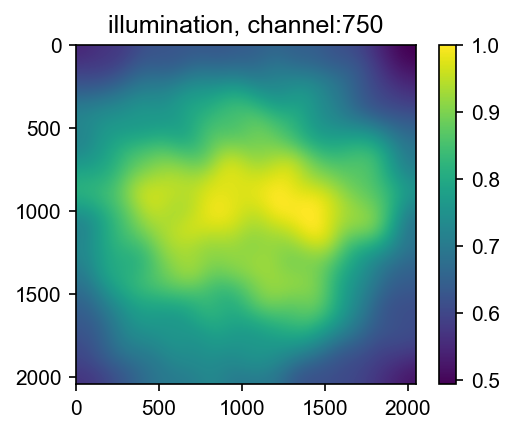

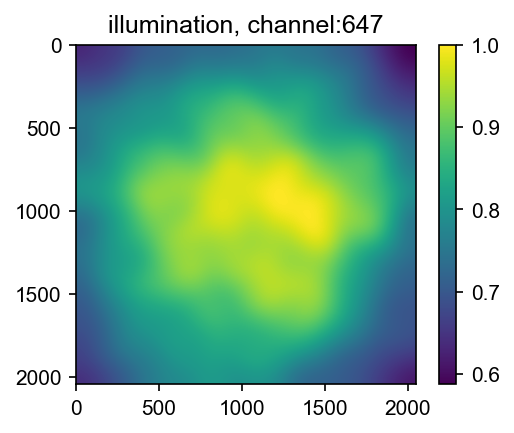

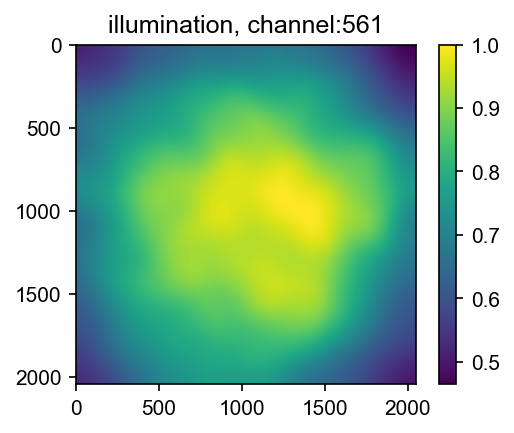

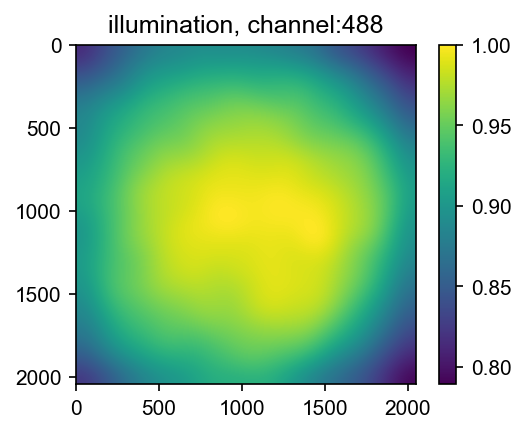

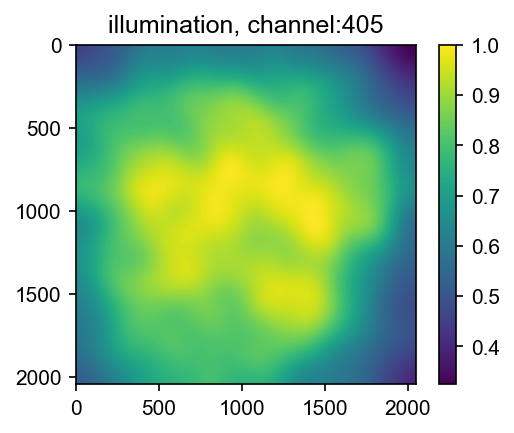

-- finish generating illumination profiles, time:1074.68s


In [7]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=True,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [8]:
cc_folder = folders[1]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H61R24Cy7 \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 30 threads in 1188.554s.
++ fitting polynomial orders: [1 1 1]
-- constants: [1.58580071e-01 1.19464347e-02 3.21968471e-06 1.10892930e-05] with rsquare=0.24378634177181036
-- constants: [ 4.66405192e-03  3.68760134e-03 -1.79231191e-03  1.78086621e-07] with rsquare=0.9566064523826201
-- constants: [-1.12869867e-01  4.23254488e-04 -8.77349299e-06 -1.79658655e-03] with rsquare=0.9587689756786716
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color


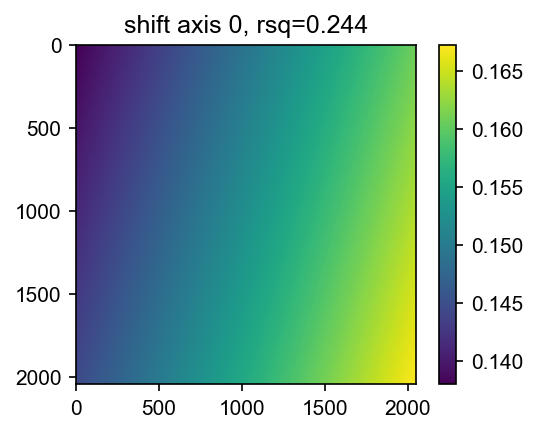

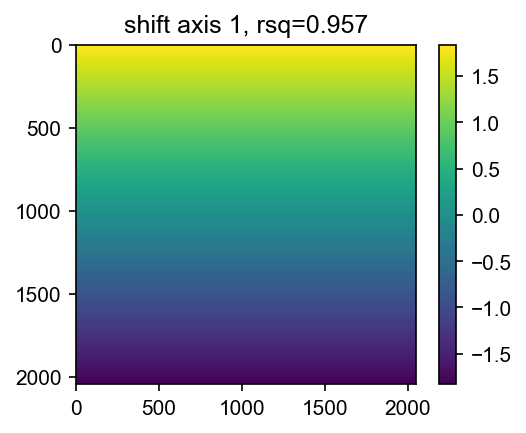

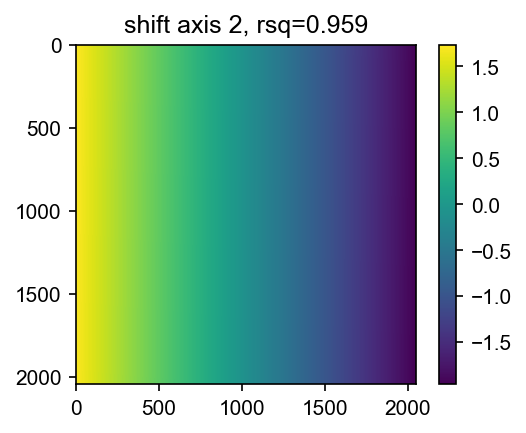

In [9]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    overwrite_temp=False, )

### check chromatic abbrevation, 750-647

In [10]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    corr_channels=['750', '647'],
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     corr_channels=['750', '647'],
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_05.dax  in 17.304s
-- removing hot pixels for channels:['647', '488'] in 20.238s
-- illumination correction for channels: 647, 488, in 3.883s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 42.756s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H61R24Cy7\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2

<IPython.core.display.Javascript object>


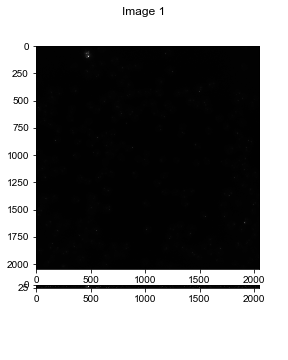

<IPython.core.display.Javascript object>


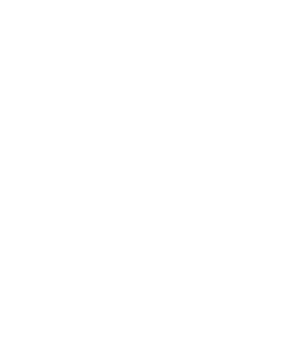

In [11]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [12]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([ 0.03, -0.44,  2.4 ]), _consts=[array([1.58580071e-01, 1.19464347e-02, 3.21968471e-06, 1.10892930e-05]), array([ 4.66405192e-03,  3.68760134e-03, -1.79231191e-03,  1.78086621e-07]), array([-1.12869867e-01,  4.23254488e-04, -8.77349299e-06, -1.79658655e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [ ]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

In [ ]:
%matplotlib notebook
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not corrected')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [ ]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_raw_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts)
print(_new_drift)

## chromatic for 561

In [14]:
cc_folder = folders[3]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H63R24Cy3 \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5


In [15]:
all_colors

['750', '647', '561', '488', '405']

-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 30 threads in 2756.106s.
++ fitting polynomial orders: [1 1 1]
-- constants: [-5.79761562e-01 -1.12045851e-02 -3.57544722e-06 -7.00400855e-06] with rsquare=0.2200739873982781
-- constants: [-6.52959488e-03 -3.10174768e-03  1.58001040e-03 -3.94189978e-06] with rsquare=0.9581068369766149
-- constants: [1.93576996e-01 1.67263478e-03 1.53827529e-06 1.57895565e-03] with rsquare=0.9595444747143586
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color


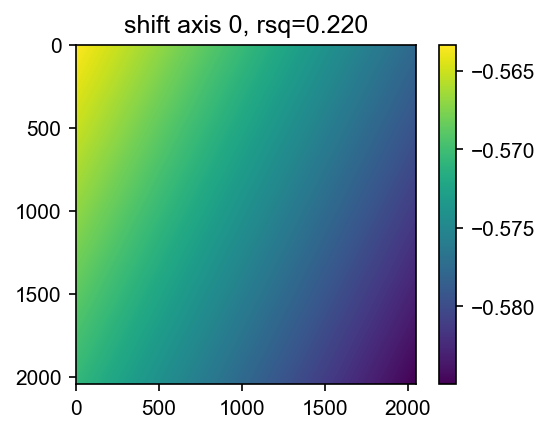

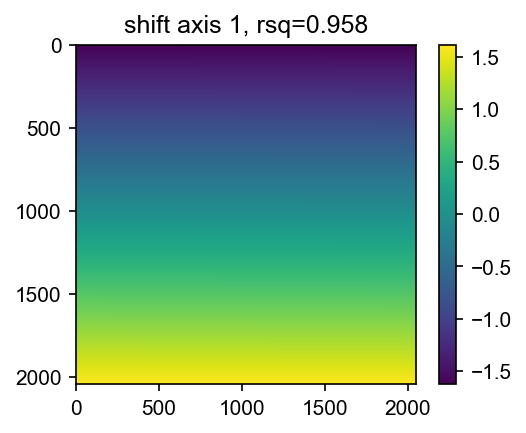

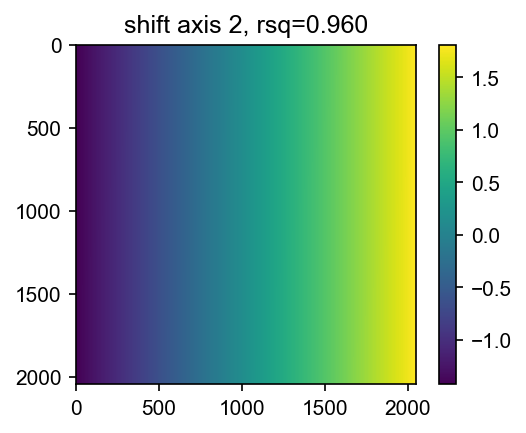

In [16]:
%matplotlib inline
reload(io_tools.load)
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '561',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_temp=True,
                                    overwrite_profile=True)

### check chromatic abbrevation, 561-647

In [18]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [561], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [561], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_05.dax  in 21.661s
-- removing hot pixels for channels:['647', '488'] in 20.430s
-- illumination correction for channels: 647, 488, in 4.072s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 48.975s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H63R24Cy3\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2

<IPython.core.display.Javascript object>


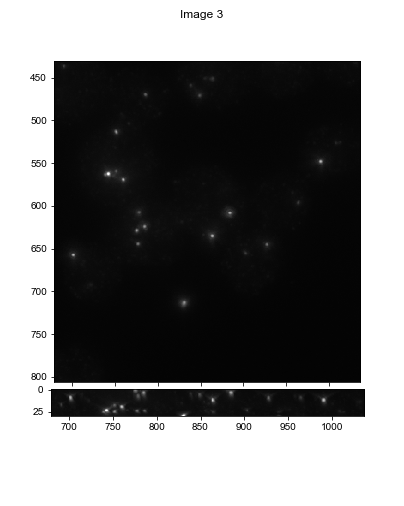

In [19]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [20]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([ 0.05, -0.56,  3.09]), _consts=[array([-5.79761562e-01, -1.12045851e-02, -3.57544722e-06, -7.00400855e-06]), array([-6.52959488e-03, -3.10174768e-03,  1.58001040e-03, -3.94189978e-06]), array([1.93576996e-01, 1.67263478e-03, 1.53827529e-06, 1.57895565e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [21]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '561', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '561', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:561, 500 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.


normalize total background:435.00, 500 fitted in 56.953s.
-- start fitting spots in channel:561, 500 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


normalize total background:435.00, 500 fitted in 56.979s.
-- start fitting spots in channel:647, 381 seeded, normalize total background:445.00, 381 fitted in 52.134s.


<IPython.core.display.Javascript object>


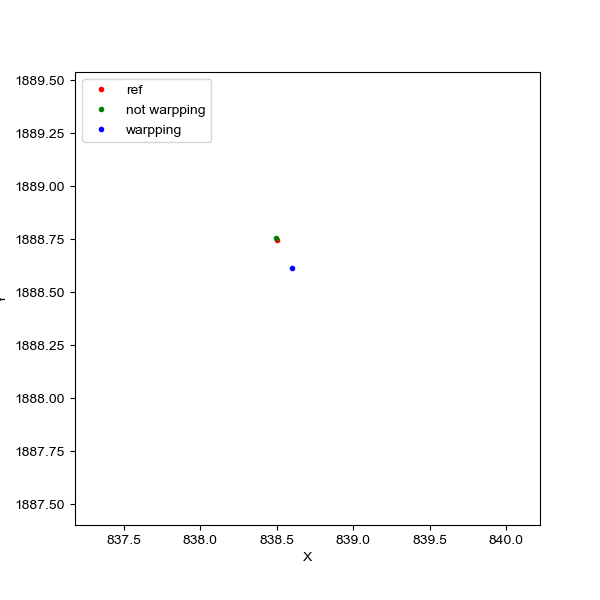

In [24]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
#plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

# bleedthrough correction

In [27]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647', '561']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750', '647', '561'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':800,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 60 images in 30 threads in 4.440s.
-- only keep the top 1000 spots from 7033 for bleedthrough interpolation.
- check 1000 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.872, total: 0.872 in 20.401s


E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:175: RuntimeWarning: divide by zero encountered in true_divide
  _nb_weights = 1 / np.linalg.norm(_nb_coords-_coord, axis=1)
E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:176: RuntimeWarning: invalid value encountered in true_divide
  _nb_weights = _nb_weights / np.sum(_nb_weights)


-- iter: 2, kept in this round: 0.883, total: 0.770 in 15.438s
-- iter: 3, kept in this round: 0.931, total: 0.717 in 11.913s
-- iter: 4, kept in this round: 0.934, total: 0.670 in 10.332s
-- iter: 5, kept in this round: 0.931, total: 0.624 in 9.034s
-- iter: 6, kept in this round: 0.954, total: 0.595 in 7.824s
- 595 pairs passed.
-- 595 spots are used to generate profiles from 750 to 647
[ 9.54780875e-02 -8.45244806e-04  3.16053239e-05  4.09561274e-05
  1.37502223e-05  1.93887344e-07 -1.19050541e-07 -1.46531024e-08
 -3.83919601e-09 -1.64918142e-08] 0.21522402822572362
[ 2.35349093e+02  8.16083709e-01  9.35960759e-02  1.15236414e-01
 -3.12643869e-03  8.42601500e-05 -5.86029240e-04 -3.92592950e-05
 -6.74304109e-06 -3.47471359e-05] 0.7023154925762204
-- saving bleedthrough temp profile from channel: 750 to channel: 647.


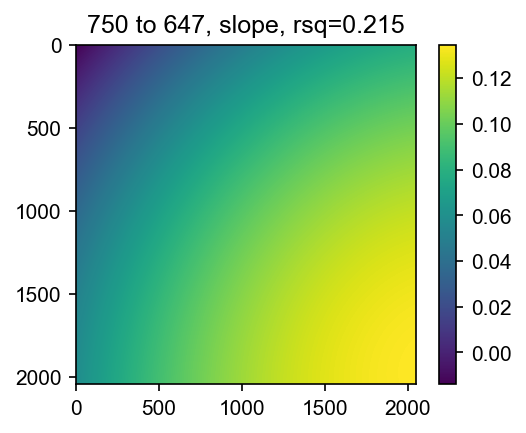

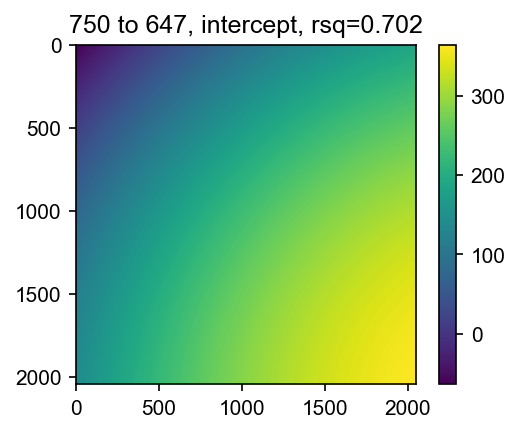

-- not enough spots (7) from 750 to 561
-- not enough spots (3) from 647 to 750
-- only keep the top 1000 spots from 9859 for bleedthrough interpolation.
- check 1000 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.865, total: 0.865 in 20.190s
-- iter: 2, kept in this round: 0.859, total: 0.743 in 15.139s
-- iter: 3, kept in this round: 0.904, total: 0.672 in 11.169s
-- iter: 4, kept in this round: 0.909, total: 0.611 in 9.114s
-- iter: 5, kept in this round: 0.912, total: 0.557 in 7.409s
-- iter: 6, kept in this round: 0.932, total: 0.519 in 6.153s
-- iter: 7, kept in this round: 0.925, total: 0.480 in 5.351s
-- iter: 8, kept in this round: 0.944, total: 0.453 in 4.577s
-- iter: 9, kept in this round: 0.954, total: 0.432 in 4.029s
- 432 pairs passed.
-- 432 spots are used to generate profiles from 647 to 561
[ 8.97671835e-02 -6.71098053e-05 -2.57450212e-06 -2.00052158e-06
  1.73994477e-06  6.45699499e-10 -1.97487694

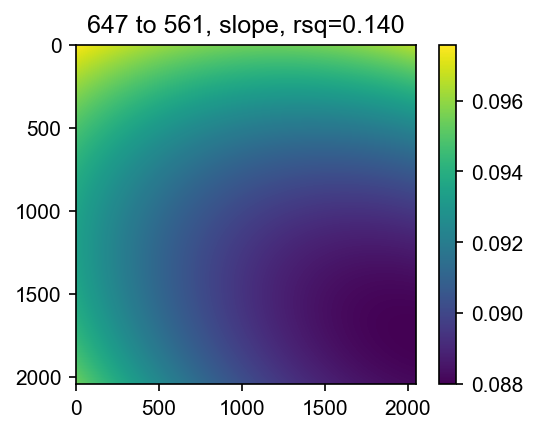

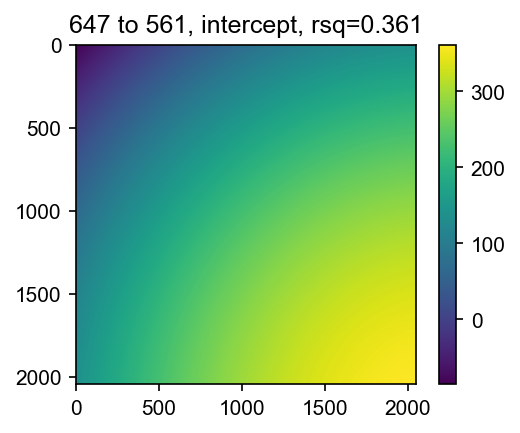

-- not enough spots (1) from 561 to 750
-- not enough spots (15) from 561 to 647
-- saving to file:\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\Corrections_3color\bleedthrough_correction_750_647_561_2048_2048.npy


In [30]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:4], rsq_th=0.8,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [31]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [32]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[1], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H61R24Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H61R24Cy7\Conv_zscan_03.dax  in 34.173s
-- removing hot pixels for channels:['750', '647', '561'] in 30.376s
-- illumination correction for channels: 750, 647, 561, in 5.799s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 73.224s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H61R24Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.n

<IPython.core.display.Javascript object>


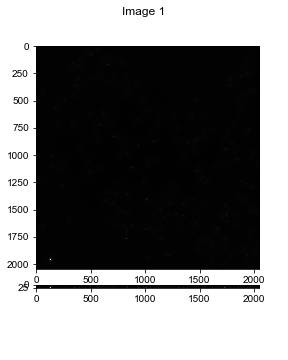

In [35]:
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [36]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[2], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_03.dax  in 45.551s
-- removing hot pixels for channels:['750', '647', '561'] in 44.785s
-- illumination correction for channels: 750, 647, 561, in 8.086s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 119.491s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200807-B_Dox-IAA-STI+_CTP-08_IgH\H62R24Cy5\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.

<IPython.core.display.Javascript object>


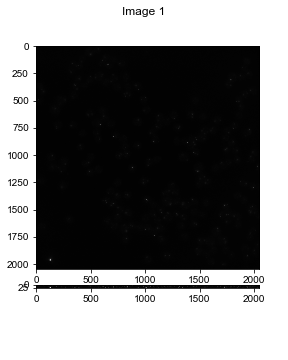

In [37]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[1], cy5_corr_ims[1], cy5_raw_ims[2], cy5_corr_ims[2]])

## Check bleedthrough for cy3

In [97]:
reload(ia.io_tools.load)
cy3_filename = os.path.join(folders[2], fovs[3])

cy3_raw_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy3_corr_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax  in 3.602s
-- removing hot pixels for channels:['750', '647', '561'] in 35.113s
-- illumination correction for channels: 750, 647, 561, in 7.695s
- correct the whole fov for image: \\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048x2048.npy
-- loading imag

<IPython.core.display.Javascript object>


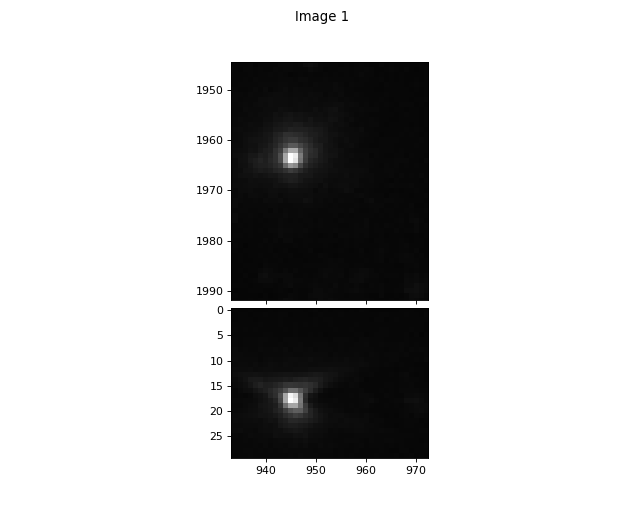

In [99]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy3_raw_ims[0], cy3_raw_ims[1], cy3_corr_ims[1], cy3_corr_ims[0]])